# Proyek Analisis Data: E - Commerce Sales and RFM Analyst

- **Nama:** Sarah Salsabila
- **Email:** ssalsabila551@gmail.com
- **ID Dicoding:** sarsabila

## Pendahuluan 

Proyek ini bertujuan untuk melakukan analisis mendalam terhadap dataset e-commerce yang disediakan oleh Olist di platform Kaggle. Dataset ini berisi informasi mengenai transaksi penjualan, ulasan produk, serta data terkait pengiriman yang menggambarkan dinamika pasar e-commerce di Brasil. Dengan menggunakan data ini, proyek ini akan mengeksplorasi berbagai pola dan tren yang ada, untuk memahami perilaku konsumen, preferensi produk, dan faktor-faktor yang memengaruhi keberhasilan penjualan di pasar digital Brasil.

## Menentukan Pertanyaan Bisnis


- Produk dengan Kategori apa yang memiliki penjualan Tertinggi dan Terendah?
- Pada bulan apa pembelian tertinggi terjadi?
- Seiring berjalannya waktu, Bagaimana performa penjualan pada platform E-Commerce ?
- Metode pembayaran apa yang paling populer di kalangan pelanggan?
- Bagaimana tingkat kepuasan customer terhadap layanan ?
- Seberapa sering pelanggan melakukan banyak transaksi?
- Berapa banyak yang biasanya dihabiskan oleh seorang pelanggan dalam satu transaksi?


## Import Semua Packages/Library yang Digunakan

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import streamlit as st
import datetime as dt
import unidecode
import urllib

### Define Color Palette yang akan jadi pilihan untuk digunakan.

In [3]:
#Color Palette
#Anak Senja
golden_ocean_colors = ['#006C76', '#F5D600', '#FF8C00', '#4AC3F2', '#FAF9F0']
ocean_sunset_colors = ['#1E3A5F', '#F4A300', '#FF5733', '#87CEFA', '#FFFFFF']
deep_ocean_sunset_colors = ['#006994', '#F9D23A', '#FF5733', '#FF5C8D', '#3BB273']
sunset_theme_colors = ['#3A7CA5', '#F6A800', '#FF6A13', '#F66C70', '#5A4B8D']
tropical_beach_colors = ['#4A8C99', '#FFD700', '#40E0D0', '#FF5733', '#FFF5EE']
pastel_beach_palette = ['#A0D9E8',  # Soft Ocean Blue
                         '#F7C8D7',  # Pastel Pink
                         '#F9E79F',  # Pastel Yellow
                         '#A8D5BA',  # Mint Green
                         '#D0A6E1',  # Soft Lavender
                         '#FFD1B3']  # Pastel Peach
#Cutegurl
pastel_lilac_purple_palette = [
    '#E6C9E8',  # Lavender Light Purple (Lavender Pastel)
    '#D8A8D5',  # Lilac Light Purple
    '#F7C8D7',  # Soft Pink (Pastel Pink)
    '#BFA0D8',  # Pastel Purple
    '#A0C4FF',  # Soft Blue (Pastel Blue)
    '#B8E5D4'   # Mint Green (Soft Mint Green)
]
palette_4 = ['#9B79B6',  # Soft Plum
             '#FFD1B3',  # Pastel Peach
             '#A0C4FF',  # Soft Blue
             '#F7C8D7',  # Soft Pink
             '#E6C9E8']  # Lavender Light Purple
palette_5 = ['#D0A6E1',  # Lavender
             '#A8D5BA',  # Mint Green
             '#F9E79F',  # Pastel Yellow
             '#E6C9E8',  # Lavender Light Purple
             '#F7C8D7']  # Soft Pink
palette_3 = ['#BFA0D8',  # Pastel Purple
             '#D8A8D5',  # Lilac
             '#A0D9E8',  # Aqua Pastel
             '#F9E79F',  # Pastel Yellow
             '#C0A8E4']  # Soft Periwinkle
palette_2 = ['#D0A6E1',  # Lavender
             '#FFD1B3',  # Pastel Peach
             '#A8D5BA',  # Mint Green
             '#F7C8D7',  # Soft Pink
             '#E6C9E8']  # Lavender Light Purple
palette_1 = ['#D8A8D5',  # Lilac Light Purple
             '#F5A1B1',  # Soft Coral
             '#B8E5D4',  # Mint Green
             '#E6C9E8',  # Lavender Light Purple
             '#A0C4FF']  # Soft Blue


## Data Wrangling

### Gathering Data

In [4]:
# Data customer
customers_df = pd.read_csv("dataset/customers_dataset.csv")
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [5]:
# Data Geolocation
geo_df = pd.read_csv("dataset/geolocation_dataset.csv")
geo_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [6]:
# Data Order Item
oritem_df = pd.read_csv("dataset/order_items_dataset.csv")
oritem_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [7]:
# Data Order Payments
orment_df = pd.read_csv("dataset/order_payments_dataset.csv")
orment_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [8]:
# Data Order reviews
orview_df = pd.read_csv("dataset/order_reviews_dataset.csv")
orview_df.head()


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [9]:
# Data Order
order_df = pd.read_csv("dataset/orders_dataset.csv")
order_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [10]:
# Data Product Category Name
catname_df = pd.read_csv("dataset/product_category_name_translation.csv")
catname_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [11]:
# Data Product
product_df = pd.read_csv("dataset/products_dataset.csv")
product_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [12]:
# Data seller
seller_df = pd.read_csv("dataset/sellers_dataset.csv")
seller_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [13]:
print("kolom Customers :", customers_df.columns)
print("kolom Geolocation :", geo_df.columns)
print("kolom Orders Item :", oritem_df.columns,"<hr>")
print("kolom Order Payment :", orment_df.columns,"<hr>")
print("kolom Order Review :", orview_df.columns,"<hr>")
print("kolom Order :", order_df.columns,"<hr>")
print("kolom Category name product :", catname_df.columns,"<hr>")
print("kolom Product :", product_df.columns,"<hr>")
print("kolom Sellers :", seller_df.columns,"<hr>")



kolom Customers : Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state'],
      dtype='object')
kolom Geolocation : Index(['geolocation_zip_code_prefix', 'geolocation_lat', 'geolocation_lng',
       'geolocation_city', 'geolocation_state'],
      dtype='object')
kolom Orders Item : Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value'],
      dtype='object') <hr>
kolom Order Payment : Index(['order_id', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value'],
      dtype='object') <hr>
kolom Order Review : Index(['review_id', 'order_id', 'review_score', 'review_comment_title',
       'review_comment_message', 'review_creation_date',
       'review_answer_timestamp'],
      dtype='object') <hr>
kolom Order : Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier

**Insight:**
- Dataset terdiri dari 9 file CSV yang berbeda, yang masing-masing berisi informasi yang berbeda tentang transaksi e-commerce di Brazil.
- Data ini mencakup informasi tentang pelanggan, produk, penjualan, ulasan, dan pengiriman.
- Data ini akan digunakan untuk menganalisis tren penjualan, perilaku konsumen, dan faktor-faktor yang memengaruhi keberhasilan penjualan di pasar digital Brazil.

### Assessing Data

In [14]:
print('\n', customers_df.info())
print('\n', geo_df.info())
print('\n', oritem_df.info())
print('\n', orment_df.info())
print('\n', orview_df.info())
print('\n', order_df.info())
print('\n', catname_df.info())
print('\n', product_df.info())
print('\n', seller_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB

 None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non

In [15]:
print('Null customers:\n', customers_df.isnull().sum())
print('\nNull geolocation:\n', geo_df.isnull().sum())
print('\nNull order items:\n', oritem_df.isnull().sum())
print('\nNull order payments:\n', orment_df.isnull().sum())
print('\nNull order reviews:\n', orview_df.isnull().sum())
print('\nNull orders:\n', order_df.isnull().sum())
print('\nNull product category:\n', catname_df.isnull().sum())
print('\nNull products:\n', product_df.isnull().sum())
print('\nNull sellers:\n', seller_df.isnull().sum())

Null customers:
 customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

Null geolocation:
 geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

Null order items:
 order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

Null order payments:
 order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

Null order reviews:
 review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp     

**Insight:**
- Terdapat Null Values pada 3 Dataframe :
  1. Pada data Order Review [ `review_comment_title`, `review_comment_message` ]
  2. Pada data Order [`order_approved_at`, `order_delivered_carrier_date`, `order_delivered_customer_date`, `order_estimated_delivery_date`]
  3. Pada data Product [`product_category_name`, `product_name_lenght`, `product_description_lenght`, `product_photos_qty`]

In [16]:
print('duplikat customers:', customers_df.duplicated().sum())
print('duplikat geolocation:', geo_df.duplicated().sum())
print('duplikat order items:', oritem_df.duplicated().sum())
print('duplikat order payments:', orment_df.duplicated().sum())
print('duplikat order reviews:', orview_df.duplicated().sum())
print('duplikat orders:', order_df.duplicated().sum())
print('duplikat product category:', catname_df.duplicated().sum())
print('duplikat products:', product_df.duplicated().sum())
print('duplikat sellers:', seller_df.duplicated().sum())

duplikat customers: 0
duplikat geolocation: 261831
duplikat order items: 0
duplikat order payments: 0
duplikat order reviews: 0
duplikat orders: 0
duplikat product category: 0
duplikat products: 0
duplikat sellers: 0


**Insight:**
- Terdapat nilai duplikat pada `geolocation` sebesar 261831.

In [17]:
print('Describe customers:', customers_df.describe(include='all'))
print('Describe geolocation:', geo_df.describe(include='all'))
print('Describe order items:', oritem_df.describe(include='all'))
print('Describe order payments:', orment_df.describe(include='all'))
print('Describe order reviews:', orview_df.describe(include='all'))
print('Describe orders:', order_df.describe(include='all'))
print('Describe product category:', catname_df.describe(include='all'))
print('Describe products:', product_df.describe(include='all'))
print('Describe sellers:', seller_df.describe(include='all'))

Describe customers:                              customer_id                customer_unique_id  \
count                              99441                             99441   
unique                             99441                             96096   
top     274fa6071e5e17fe303b9748641082c8  8d50f5eadf50201ccdcedfb9e2ac8455   
freq                                   1                                17   
mean                                 NaN                               NaN   
std                                  NaN                               NaN   
min                                  NaN                               NaN   
25%                                  NaN                               NaN   
50%                                  NaN                               NaN   
75%                                  NaN                               NaN   
max                                  NaN                               NaN   

        customer_zip_code_prefix customer_c

### Melakukan penggabungan pada data order

In [18]:
# Merging data
all_orders_df = order_df.merge(oritem_df, on='order_id', how='left').merge(orment_df, on='order_id', how='left')
all_orders_df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,1.0,credit_card,1.0,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,3.0,voucher,1.0,2.00
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,2.0,voucher,1.0,18.59
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,1.0,boleto,1.0,141.46
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1.0,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,1.0,credit_card,3.0,179.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118429,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00,1.0,f1d4ce8c6dd66c47bbaa8c6781c2a923,1f9ab4708f3056ede07124aad39a2554,2018-02-12 13:10:37,174.90,20.10,1.0,credit_card,3.0,195.00
118430,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00,1.0,b80910977a37536adeddd63663f916ad,d50d79cb34e38265a8649c383dcffd48,2017-09-05 15:04:16,205.99,65.02,1.0,credit_card,5.0,271.01
118431,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,1.0,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,40.59,1.0,credit_card,4.0,441.16
118432,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,2.0,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,40.59,1.0,credit_card,4.0,441.16


**Insight:**
- Data yang dibutuhkan kemudian akan diambil dari beberapa file CSV yang berbeda, dan akan digabungkan menjadi satu dataset yang lebih besar untuk analisis lebih lanjut.

In [19]:
print('\nNull all order:\n', all_orders_df.isnull().sum())


Null all order:
 order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 176
order_delivered_carrier_date     2074
order_delivered_customer_date    3397
order_estimated_delivery_date       0
order_item_id                     830
product_id                        830
seller_id                         830
shipping_limit_date               830
price                             830
freight_value                     830
payment_sequential                  3
payment_type                        3
payment_installments                3
payment_value                       3
dtype: int64


**Insight:**
- Setelah menggabungkan data, dilakukan kembali pengecekan terhadap data untuk memastikan apakah data siap untuk dilakukan analisis lebih lanjut.
- Ternyata masih terdapat beberapa nilai yang null pada kolom `order_approved_at`, `order_delivered_carrier_date`, `order_delivered_customer_date`, `order_item_id`, `product_id`, `seller_id`, `shipping_limit_date`, `price`, dan `freight_value`.

In [20]:
all_orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118434 entries, 0 to 118433
Data columns (total 18 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       118434 non-null  object 
 1   customer_id                    118434 non-null  object 
 2   order_status                   118434 non-null  object 
 3   order_purchase_timestamp       118434 non-null  object 
 4   order_approved_at              118258 non-null  object 
 5   order_delivered_carrier_date   116360 non-null  object 
 6   order_delivered_customer_date  115037 non-null  object 
 7   order_estimated_delivery_date  118434 non-null  object 
 8   order_item_id                  117604 non-null  float64
 9   product_id                     117604 non-null  object 
 10  seller_id                      117604 non-null  object 
 11  shipping_limit_date            117604 non-null  object 
 12  price                         

**Insight:**
- Data all_orders yang sudah digabungkan berisikan kolom sebesar 17 dan baris sebanyak 118434.

### Penggabungan Data Product

In [21]:
# Merging product_df dan catname_df
all_products_df = product_df.merge(catname_df, on='product_category_name', how='left')
all_products_df

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares
...,...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0,furniture_decor
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0,construction_tools_lights
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0,bed_bath_table
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0,computers_accessories


In [22]:
# Ganti nama kolom product_category_name_english menjadi product_category
all_products_df.rename(columns={'product_category_name_english': 'product_category'}, inplace=True)
all_products_df

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares
...,...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0,furniture_decor
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0,construction_tools_lights
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0,bed_bath_table
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0,computers_accessories


**Insight:**
- Untuk mempermudah analisis, `product_category_name_english` akan dirubah menjadi `product_category` agar mempermudah analisis. 

In [23]:
print('\nNull all product:\n', all_products_df.isnull().sum())


Null all product:
 product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
product_category              623
dtype: int64


**Insight:**
- Hampir semua kolom memiliki nilai null, sehingga perlu dilakukan pengecekan lebih lanjut terhadap data untuk memastikan bahwa data sudah bersih dan siap untuk dilakukan analisis lebih lanjut.

In [24]:
orview_filtered = orview_df[['review_id', 'order_id', 'review_score']]
orview_filtered.head()


,review_id,order_id,review_score
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5


### Cleaning Data

#### Order

In [25]:
order_df[order_df.order_approved_at.isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
1130,00b1cb0320190ca0daa2c88b35206009,3532ba38a3fd242259a514ac2b6ae6b6,canceled,2018-08-28 15:26:39,NaN,NaN,NaN,2018-09-12 00:00:00
1801,ed3efbd3a87bea76c2812c66a0b32219,191984a8ba4cbb2145acb4fe35b69664,canceled,2018-09-20 13:54:16,NaN,NaN,NaN,2018-10-17 00:00:00
1868,df8282afe61008dc26c6c31011474d02,aa797b187b5466bc6925aaaa4bb3bed1,canceled,2017-03-04 12:14:30,NaN,NaN,NaN,2017-04-10 00:00:00
2029,8d4c637f1accf7a88a4555f02741e606,b1dd715db389a2077f43174e7a675d07,canceled,2018-08-29 16:27:49,NaN,NaN,NaN,2018-09-13 00:00:00
2161,7a9d4c7f9b068337875b95465330f2fc,7f71ae48074c0cfec9195f88fcbfac55,canceled,2017-05-01 16:12:39,NaN,NaN,NaN,2017-05-30 00:00:00
...,...,...,...,...,...,...,...,...
97696,5a00b4d35edffc56b825c3646a99ba9d,6a3bdf004ca96338fb5fad1b8d93c2e6,canceled,2017-07-02 15:38:46,NaN,NaN,NaN,2017-07-25 00:00:00
98415,227c804e2a44760671a6a5697ea549e4,62e7477e75e542243ee62a0ba73f410f,canceled,2017-09-28 15:02:56,NaN,NaN,NaN,2017-10-16 00:00:00
98909,e49e7ce1471b4693482d40c2bd3ad196,e4e7ab3f449aeb401f0216f86c2104db,canceled,2018-08-07 11:16:28,NaN,NaN,NaN,2018-08-10 00:00:00
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaN,NaN,NaN,2018-10-01 00:00:00


In [26]:
order_df['order_status'].unique()

array(['delivered', 'invoiced', 'shipped', 'processing', 'unavailable',
       'canceled', 'created', 'approved'], dtype=object)

In [27]:
order_df[order_df.order_delivered_carrier_date.isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaN,NaN,2017-05-09 00:00:00
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,NaN,NaN,2018-08-21 00:00:00
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09,NaN,NaN,2017-10-03 00:00:00
266,8e24261a7e58791d10cb1bf9da94df5c,64a254d30eed42cd0e6c36dddb88adf0,unavailable,2017-11-16 15:09:28,2017-11-16 15:26:57,NaN,NaN,2017-12-05 00:00:00
324,d3c8851a6651eeff2f73b0e011ac45d0,957f8e082185574de25992dc659ebbc0,processing,2016-10-05 22:44:13,2016-10-06 15:51:05,NaN,NaN,2016-12-09 00:00:00
...,...,...,...,...,...,...,...,...
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaN,NaN,NaN,2018-10-01 00:00:00
99313,e9e64a17afa9653aacf2616d94c005b8,b4cd0522e632e481f8eaf766a2646e86,processing,2018-01-05 23:07:24,2018-01-09 07:18:05,NaN,NaN,2018-02-06 00:00:00
99347,a89abace0dcc01eeb267a9660b5ac126,2f0524a7b1b3845a1a57fcf3910c4333,canceled,2018-09-06 18:45:47,NaN,NaN,NaN,2018-09-27 00:00:00
99348,a69ba794cc7deb415c3e15a0a3877e69,726f0894b5becdf952ea537d5266e543,unavailable,2017-08-23 16:28:04,2017-08-28 15:44:47,NaN,NaN,2017-09-15 00:00:00


In [28]:
# Drop missing values
all_orders_df.dropna(axis=0, inplace=True)

In [29]:
all_orders_df.isnull().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
order_item_id                    0
product_id                       0
seller_id                        0
shipping_limit_date              0
price                            0
freight_value                    0
payment_sequential               0
payment_type                     0
payment_installments             0
payment_value                    0
dtype: int64

**insight:**
- Setelah dilakukan pembersihan data pada dataframe all_orders menggunakan `.dropna()`, data sudah bersih dan siap untuk dilakukan analisis lebih lanjut.
- Metode cleaning data yang dipakai yaitu Dropping `.dropna()` karena semua fitur yang tidak berkaitan akan beresiko jika menggunakan metode Imputation `.fillna()` dan juga Interpolation `.interpolate()`.

#### Product

In [30]:
all_products_df[all_products_df.product_category.isna()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category
105,a41e356c76fab66334f36de622ecbd3a,NaN,NaN,NaN,NaN,650.0,17.0,14.0,12.0,NaN
128,d8dee61c2034d6d075997acef1870e9b,NaN,NaN,NaN,NaN,300.0,16.0,7.0,20.0,NaN
145,56139431d72cd51f19eb9f7dae4d1617,NaN,NaN,NaN,NaN,200.0,20.0,20.0,20.0,NaN
154,46b48281eb6d663ced748f324108c733,NaN,NaN,NaN,NaN,18500.0,41.0,30.0,41.0,NaN
197,5fb61f482620cb672f5e586bb132eae9,NaN,NaN,NaN,NaN,300.0,35.0,7.0,12.0,NaN
...,...,...,...,...,...,...,...,...,...,...
32515,b0a0c5dd78e644373b199380612c350a,NaN,NaN,NaN,NaN,1800.0,30.0,20.0,70.0,NaN
32589,10dbe0fbaa2c505123c17fdc34a63c56,NaN,NaN,NaN,NaN,800.0,30.0,10.0,23.0,NaN
32616,bd2ada37b58ae94cc838b9c0569fecd8,NaN,NaN,NaN,NaN,200.0,21.0,8.0,16.0,NaN
32772,fa51e914046aab32764c41356b9d4ea4,NaN,NaN,NaN,NaN,1300.0,45.0,16.0,45.0,NaN


In [31]:
all_products_df.dropna(axis=0, inplace=True)

In [32]:
all_products_df.isnull().sum()

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
product_category              0
dtype: int64

In [33]:
customers_df.isnull().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

**Insight:**
- Begitupun dengan dataframe all_products dilakukan pembersihan data pada menggunakan `.dropna()`, data sudah bersih dan siap untuk dilakukan analisis lebih lanjut.
- Metode cleaning data yang dipakai yaitu Dropping `.dropna()` karena semua fitur yang tidak berkaitan akan beresiko jika menggunakan metode Imputation `.fillna()` dan juga Interpolation `.interpolate()`.

#### Main Data

In [34]:
all_product_order = all_orders_df.merge(customers_df, on='customer_id', how='left').merge(all_products_df, on='product_id', how='left')

In [35]:
# Cek missing value
all_product_order.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                   0
order_delivered_carrier_date        0
order_delivered_customer_date       0
order_estimated_delivery_date       0
order_item_id                       0
product_id                          0
seller_id                           0
shipping_limit_date                 0
price                               0
freight_value                       0
payment_sequential                  0
payment_type                        0
payment_installments                0
payment_value                       0
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
product_category_name            1651
product_name_lenght              1651
product_description_lenght       1651
product_photos_qty               1651
product_weig

In [36]:
all_product_order.dropna(axis=0, inplace=True)
all_product_order.isnull().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
order_item_id                    0
product_id                       0
seller_id                        0
shipping_limit_date              0
price                            0
freight_value                    0
payment_sequential               0
payment_type                     0
payment_installments             0
payment_value                    0
customer_unique_id               0
customer_zip_code_prefix         0
customer_city                    0
customer_state                   0
product_category_name            0
product_name_lenght              0
product_description_lenght       0
product_photos_qty               0
product_weight_g                 0
product_length_cm                0
product_height_cm   

In [37]:
# Export data
all_product_order.to_csv('dataset/productOrder_data.csv', index=False)

**Insight:**
- Dan terakhir, dataframe all_products dilakukan pembersihan data pada menggunakan `.dropna()`, data sudah bersih dan siap untuk dilakukan analisis lebih lanjut.

## Exploratory Data Analysis (EDA)

### Explore Order Product Data

In [38]:
all_product_order = pd.read_csv("dataset/productOrder_data.csv")
all_product_order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113367 entries, 0 to 113366
Data columns (total 31 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       113367 non-null  object 
 1   customer_id                    113367 non-null  object 
 2   order_status                   113367 non-null  object 
 3   order_purchase_timestamp       113367 non-null  object 
 4   order_approved_at              113367 non-null  object 
 5   order_delivered_carrier_date   113367 non-null  object 
 6   order_delivered_customer_date  113367 non-null  object 
 7   order_estimated_delivery_date  113367 non-null  object 
 8   order_item_id                  113367 non-null  float64
 9   product_id                     113367 non-null  object 
 10  seller_id                      113367 non-null  object 
 11  shipping_limit_date            113367 non-null  object 
 12  price                         

**Insight:**
- Data yang akan kita pakai yaitu gabungan dari 3 data, yaitu `all_orders`, `all_products`, dan `customers`. Yang menghasilkan 30 kolom dan 113367 baris.

In [39]:
all_product_order.describe()

,order_item_id,price,freight_value,payment_sequential,payment_installments,payment_value,customer_zip_code_prefix,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,113367.000000,113367.000000,113367.000000,113367.000000,113367.000000,113367.000000,113367.000000,113367.000000,113367.000000,113367.000000,113367.000000,113367.000000,113367.000000,113367.000000
mean,1.196856,120.161067,20.024231,1.089947,2.942532,172.222013,35081.859236,48.800427,785.794746,2.209241,2110.532633,30.282834,16.617411,23.099694
std,0.701325,182.714900,15.753323,0.682120,2.777846,266.576121,29845.463618,10.018615,651.018280,1.720307,3770.553691,16.161733,13.448605,11.741288
min,1.000000,0.850000,0.000000,1.000000,0.000000,0.000000,1003.000000,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,1.000000,39.900000,13.080000,1.000000,1.000000,61.000000,11320.000000,42.000000,346.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,1.000000,74.900000,16.320000,1.000000,2.000000,108.140000,24325.000000,52.000000,601.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,1.000000,133.700000,21.200000,1.000000,4.000000,189.370000,58775.000000,57.000000,985.000000,3.000000,1800.000000,38.000000,20.000000,30.000000
max,21.000000,6735.000000,409.680000,26.000000,24.000000,13664.080000,99980.000000,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


**Insight:**
- Mengecek data yang memiliki nilai numerik pada `all_prodcut_order`.
- Dari fungsi diatas dapat diketahui bahwa pelanggan yang melakukan pembelian paling banyak sebesar 21 kali. Dan pelanggan yang melakukan pembelian paling sedikit sebesar 1 kali.
- Harga produk yang paling mahal sebesar 6735.00 dan harga produk yang paling murah sebesar 0.85.

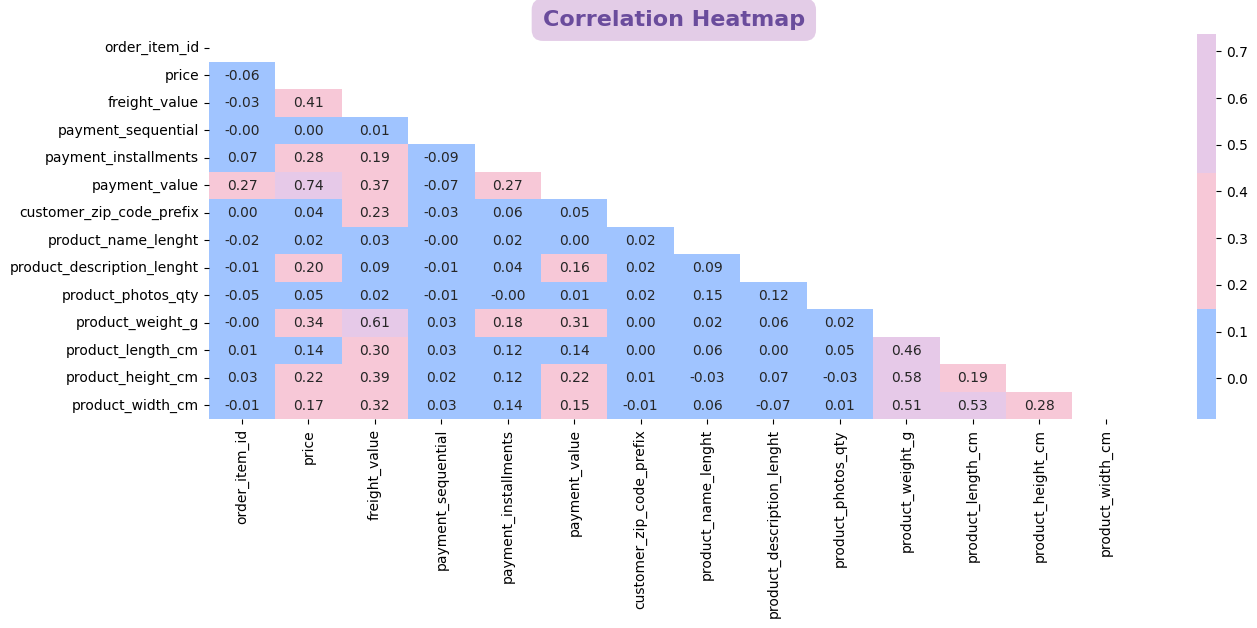

In [40]:
fig, axe = plt.subplots(figsize=(15,5))
correlation_matrix = all_product_order.corr(numeric_only=True)
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, annot=True, mask=mask, cmap=palette_4, center=0, fmt=".2f")
plt.title("Correlation Heatmap", 
          color="#6A4C9C",  
          fontsize=16,      
          fontweight='bold',
          bbox=dict(facecolor='#D8B7DD', alpha=0.7, edgecolor='none', boxstyle='round,pad=0.5'))  
plt.show()

**Insight:**
- Dari heatmap diatas, dapat dilihat bahwa terdapat korelasi yang cukup kuat antara `price` dan `freight_value` yaitu sebesar 0.41. Dan ada kemungkinan bahwa harga produk yang mahal akan dikenakan biaya pengiriman yang lebih mahal.
- Selain itu, terdapat korelasi yang cukup kuat antara `product_weight_g` dan `product_length_cm`, `product_weight_g` dan `product_height_cm`, serta `product_weight_g` dan `product_width_cm`.

In [41]:
# Konversi order_purchase_timestamp ke format datetime
all_orders_df['order_purchase_timestamp'] = pd.to_datetime(all_orders_df['order_purchase_timestamp'])

# Buat agregasi jumlah order per bulan
monthly_orders = all_orders_df.resample('MS', on='order_purchase_timestamp').size()
monthly_orders

order_purchase_timestamp
2016-10-01     336
2016-11-01       0
2016-12-01       1
2017-01-01     961
2017-02-01    1949
2017-03-01    3078
2017-04-01    2707
2017-05-01    4260
2017-06-01    3687
2017-07-01    4726
2017-08-01    5053
2017-09-01    5002
2017-10-01    5455
2017-11-01    8812
2017-12-01    6440
2018-01-01    8364
2018-02-01    7766
2018-03-01    8337
2018-04-01    8112
2018-05-01    8104
2018-06-01    7318
2018-07-01    7196
2018-08-01    7354
Freq: MS, dtype: int64

**Insight:**
- Dapat diketahui bahwa time series data cenderung memiliki tren yang naik turun, dan terdapat pola yang berulang setiap tahunnya. Namun pada data diatas dari tahun 2016 hingga 2018, terdapat kenaikan yang cukup signifikan pada tahun 2017.

In [48]:
payment_trend = all_orders_df.pivot_table(
    index=all_orders_df['order_purchase_timestamp'].dt.to_period('M'), 
    columns='payment_type', 
    aggfunc='size', 
    fill_value=0
)

In [49]:
payment_trend.describe()

payment_type,boleto,credit_card,debit_card,voucher
count,22.000000,22.000000,22.000000,22.000000
mean,1015.772727,3858.863636,75.136364,278.318182
std,521.517012,2116.086781,80.094168,129.343539
min,0.000000,1.000000,0.000000,0.000000
25%,683.500000,2285.250000,26.500000,228.250000
50%,1087.000000,3806.500000,49.500000,314.000000
75%,1460.750000,5755.250000,80.250000,374.500000
max,1714.000000,6621.000000,298.000000,460.000000


**Insight:**
- Data tersebut menunjukkan bahwa metode pembayaran yang paling populer adalah menggunakan kartu kredit. Disusul oleh pembayaran dengan boleto dan voucher. Sedangkan metode pembayaran yang paling jarang digunakan adalah debit card.

## Visualization & Explanatory Analysis

### EDA Bivariate

In [52]:
# Hitung total penjualan per kategori produk
category_sales = all_product_order.groupby('product_category')['price'].sum().sort_values(ascending=False)
category_sales.columns = ['Kategori Produk', 'Total Penjualan']

In [53]:
# Urutkan berdasarkan total penjualan
top_categories = category_sales.sort_values(ascending=False).head(10)
bottom_categories = category_sales.sort_values(ascending=True).head(10)

In [54]:
top_categories

product_category
health_beauty            1271413.18
watches_gifts            1213162.80
bed_bath_table           1077834.14
sports_leisure            990417.74
computers_accessories     918837.87
furniture_decor           745748.80
housewares                648187.74
cool_stuff                634163.78
auto                      602881.75
garden_tools              492255.08
Name: price, dtype: float64

In [55]:
bottom_categories


product_category
security_and_services         283.29
fashion_childrens_clothes     519.95
cds_dvds_musicals             730.00
home_comfort_2                773.17
flowers                      1110.04
diapers_and_hygiene          1500.79
arts_and_craftmanship        1814.01
fashion_sport                2094.52
la_cuisine                   2303.98
fashio_female_clothing       2634.94
Name: price, dtype: float64

In [56]:
# Convert Series to DataFrame
top_categories_df = top_categories.reset_index()
top_categories_df.columns = ['Kategori Produk', 'Total Penjualan']

bottom_categories_df = bottom_categories.reset_index()
bottom_categories_df.columns = ['Kategori Produk', 'Total Penjualan']

### Pertanyaan 1: Produk dengan Kategori apa yang memiliki penjualan Tertinggi dan Terendah?

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_17736\4151036433.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_categories_df, x='Total Penjualan', y='Kategori Produk', palette=pastel_lilac_purple_palette)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_17736\4151036433.py:3: UserWarning: 
The palette list has fewer values (6) than needed (10) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(data=top_categories_df, x='Total Penjualan', y='Kategori Produk', palette=pastel_lilac_purple_palette)


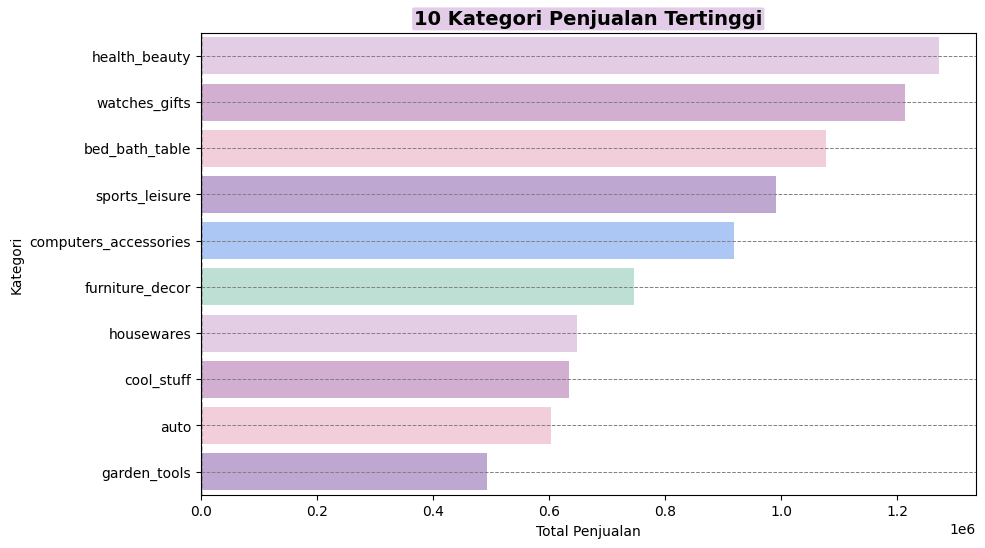

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_17736\4151036433.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=bottom_categories_df, x='Total Penjualan', y='Kategori Produk', palette=pastel_lilac_purple_palette)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_17736\4151036433.py:22: UserWarning: 
The palette list has fewer values (6) than needed (10) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(data=bottom_categories_df, x='Total Penjualan', y='Kategori Produk', palette=pastel_lilac_purple_palette)


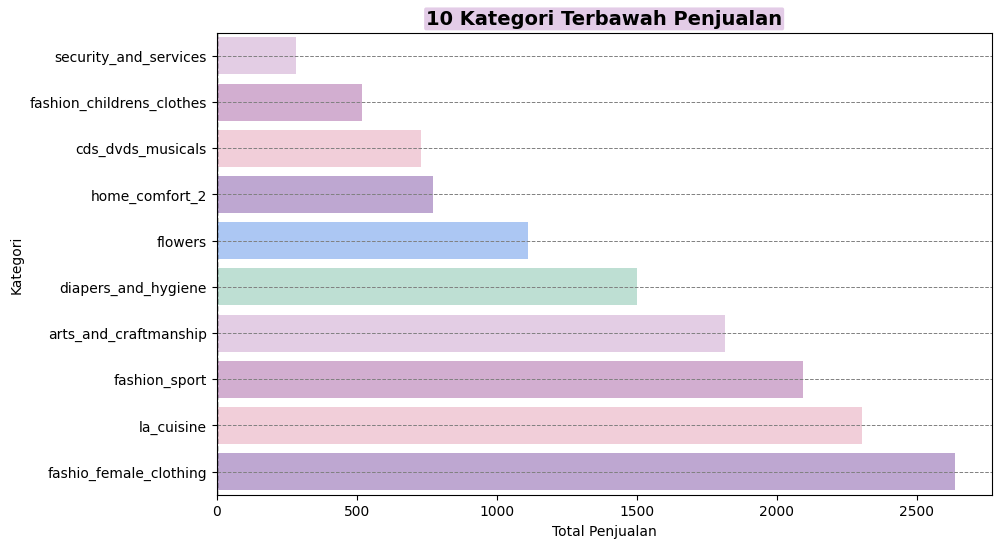

In [57]:
# Visualisasi penjualan tertinggi
plt.figure(figsize=(10, 6))
sns.barplot(data=top_categories_df, x='Total Penjualan', y='Kategori Produk', palette=pastel_lilac_purple_palette)

# Menambahkan garis pembeda (misalnya garis vertikal pada x=0)
plt.axvline(x=0, color='black', linestyle='--', linewidth=1)  # Garis vertikal hitam pada x=0

# Menambahkan garis horizontal pada beberapa titik (misalnya pada Total Penjualan tertinggi)
for y_value in top_categories_df['Kategori Produk']:
    plt.axhline(y=y_value, color='gray', linestyle='--', linewidth=0.7)

# Pengaturan lainnya
plt.title('10 Kategori Penjualan Tertinggi', fontsize=14,      
          fontweight='bold',
          bbox=dict(facecolor='#D8B7DD', alpha=0.7, edgecolor='none', boxstyle='round',pad=0.1))
plt.xlabel('Total Penjualan')
plt.ylabel('Kategori')
plt.show()

# Visualisasi penjualan terendah
plt.figure(figsize=(10, 6))
sns.barplot(data=bottom_categories_df, x='Total Penjualan', y='Kategori Produk', palette=pastel_lilac_purple_palette)

# Menambahkan garis pembeda (misalnya garis vertikal pada x=0)
plt.axvline(x=0, color='black', linestyle='--', linewidth=1)  # Garis vertikal hitam pada x=0

# Menambahkan garis horizontal pada beberapa titik (misalnya pada Total Penjualan terendah)
for y_value in bottom_categories_df['Kategori Produk']:
    plt.axhline(y=y_value, color='gray', linestyle='--', linewidth=0.7)

# Pengaturan lainnya
plt.title('10 Kategori Terbawah Penjualan', fontsize=14,      
          fontweight='bold',
          bbox=dict(facecolor='#D8B7DD', alpha=0.7, edgecolor='none', boxstyle='round',pad=0.1))
plt.xlabel('Total Penjualan')
plt.ylabel('Kategori')
plt.show()


### Pertanyaan 2 : Pada bulan apa pembelian tertinggi terjadi?

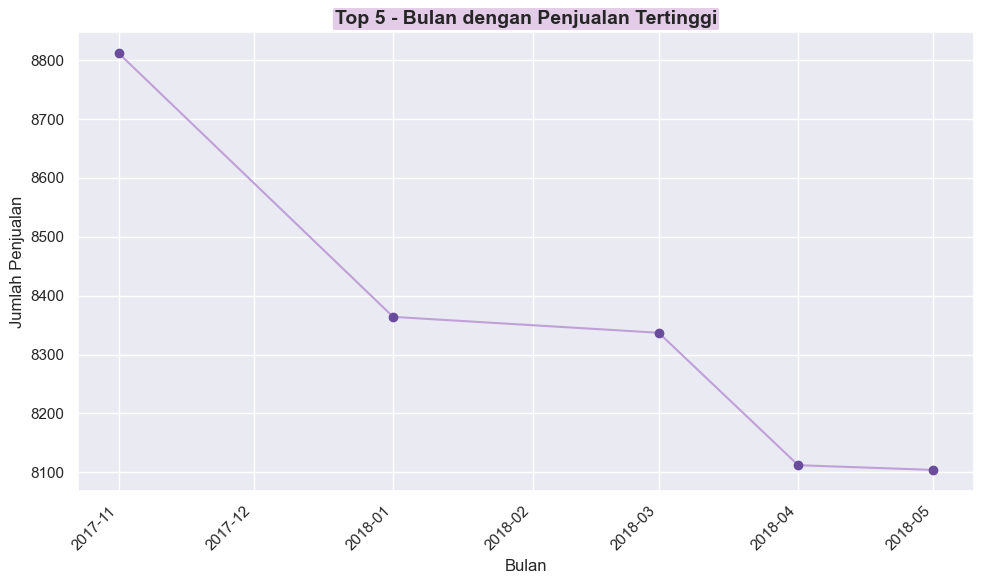

In [119]:
# Urutkan berdasarkan jumlah order dan ambil 5 bulan dengan penjualan tertinggi
top_5_months = monthly_orders.sort_values(ascending=False).head(5)

# Plot grafik
plt.figure(figsize=(10, 6))
top_5_months.plot(kind='line', color="#BFA0D8")
plt.title('Top 5 - Bulan dengan Penjualan Tertinggi', fontsize=14,      
          fontweight='bold',
          bbox=dict(facecolor='#D8B7DD', alpha=0.7, edgecolor='none', boxstyle='round',pad=0.1))
plt.xlabel('Bulan')
plt.ylabel('Jumlah Penjualan')
plt.xticks(rotation=45)
plt.scatter(top_5_months.index, top_5_months, color="#6A4C9C", zorder=5, label="Titik")
plt.tight_layout()
plt.show()

### Pertanyaan 3 : Seiring berjalannya waktu, Bagaimana performa penjualan pada platform E-Commerce ?

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_17736\1710374713.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(monthly_orders.index[i], monthly_orders[i], f'{monthly_orders[i]:,.0f}', ha='center', va='bottom', fontsize=10, color="#6A4C9C")


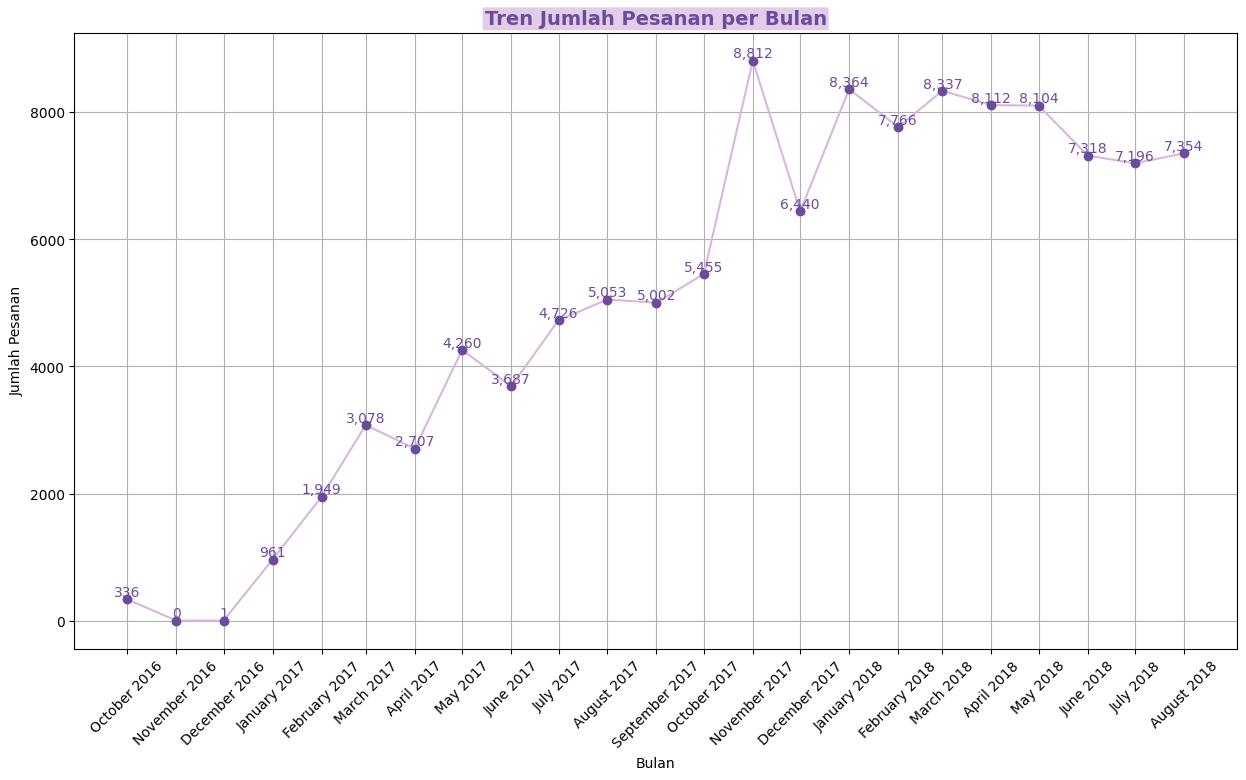

In [58]:
# Plot tren pesanan
plt.figure(figsize=(15, 8))
plt.plot(monthly_orders, marker='o', linestyle='-', color="#D8B7DD")
for i in range(len(monthly_orders)):
    plt.text(monthly_orders.index[i], monthly_orders[i], f'{monthly_orders[i]:,.0f}', ha='center', va='bottom', fontsize=10, color="#6A4C9C")
plt.xticks(monthly_orders.index, labels=monthly_orders.index.strftime('%B %Y'), rotation=45)  # Format sesuai dengan format bulan dan tahun
plt.title("Tren Jumlah Pesanan per Bulan",color="#6A4C9C", fontsize=14,      
          fontweight='bold',
          bbox=dict(facecolor='#D8B7DD', alpha=0.7, edgecolor='none', boxstyle='round',pad=0.1))
plt.scatter(monthly_orders.index, monthly_orders, color="#6A4C9C", zorder=5, label="Titik")
plt.xlabel("Bulan")
plt.ylabel("Jumlah Pesanan")
plt.grid()
plt.show()

### Pertanyaan 4 : Metode pembayaran apa yang paling populer di kalangan pelanggan?

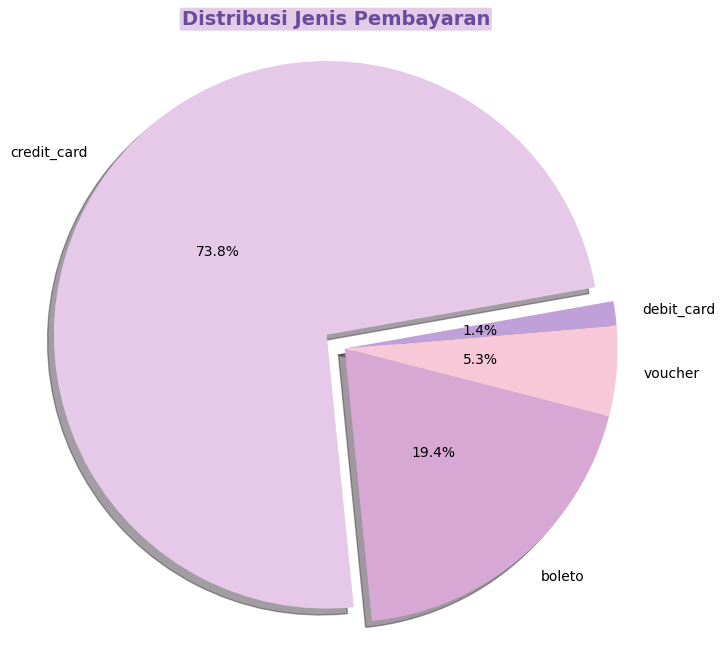

In [ ]:
import matplotlib.pyplot as plt

# Menghitung jumlah total transaksi berdasarkan jenis pembayaran
payment_trend = all_orders_df['payment_type'].value_counts()

# Membuat pie chart
plt.figure(figsize=(8, 8))
plt.pie(payment_trend, 
        labels=payment_trend.index, 
        autopct='%1.1f%%', startangle=10, 
        colors=pastel_lilac_purple_palette, explode = (0.1, 0, 0, 0),
        shadow=True,pctdistance=0.50,    # Menyesuaikan posisi persentase
        radius=1.2)     
plt.title('Distribusi Jenis Pembayaran',color="#6A4C9C",  
          fontsize=14,      
          fontweight='bold',
          bbox=dict(facecolor='#D8B7DD', alpha=0.7, edgecolor='none', boxstyle='round',pad=0.1))
plt.axis('equal')  # Agar pie chart berbentuk lingkaran sempurna
plt.show()


### Pertanyaan 5 : Bagaimana tingkat kepuasan customer terhadap layanan ?

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_17736\3245837694.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=review_scores.index,


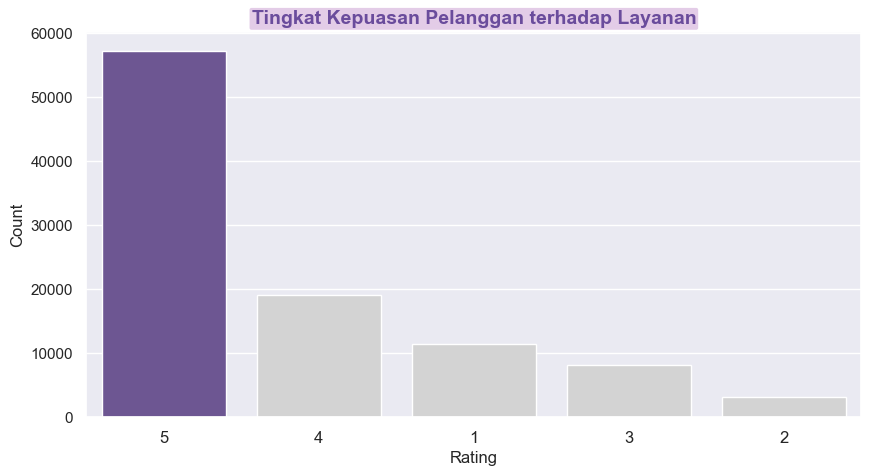

In [122]:
review_scores = orview_filtered['review_score'].value_counts().sort_values(ascending=False)

most_common_score = review_scores.idxmax()

sns.set(style="darkgrid")

plt.figure(figsize=(10, 5))
sns.barplot(x=review_scores.index,
            y=review_scores.values,
            order=review_scores.index,
            palette=["#6A4C9C" if score == most_common_score else "#D3D3D3" for score in review_scores.index]
            )

plt.title("Tingkat Kepuasan Pelanggan terhadap Layanan",color="#6A4C9C", fontsize=14,      
          fontweight='bold',
          bbox=dict(facecolor='#D8B7DD', alpha=0.7, edgecolor='none', boxstyle='round',pad=0.1))
plt.xlabel("Rating")
plt.ylabel("Count")
plt.xticks(fontsize=12)
plt.show()

**Insight:**
### Pertanyaan 1: Kategori Produk Terlaris & Terendah
>  Dalam hasil dari Exploratory didapatkan bahwa product paling banyak terjual yaitu `health_beauty`, `watches_gifts` dan `bed_bath_table`. Sedangkan paling sedikit kategori yang terjual yaitu `security_and_services`.

### Pertanyaan 2: Tren Pembelian Bulanan
> Pada bulan November 2017 terjadi peningkatan jumlah pembelian yang signifikan, disusul oleh penjualan pada bulan Januari 2018
### Pertanyaan 3: Tren Jumlah Transaksi (2016-2018)
> Terjadi peningkatan bertahap jumlah transaksi dari 2016 hingga 2018, namun terjadi penurunan pada tahun 2018. Tertinggi pada tahun 2017 dan terendah pada tahun 2016.

### Pertanyaan 4: Metode Pembayaran Terbanyak
> Metode pembayaran yang paling banyak digunakan adalah kartu kredit, disusul oleh boleto dan voucher. Sedangkan metode pembayaran yang paling jarang digunakan adalah debit card.

### Pertanyaan 5: Kepuasan Pelanggan
> Sebagian besar pelanggan memberikan rating 5 terhadap layanan yang diberikan oleh Olist, yang menunjukkan bahwa sebagian besar pelanggan puas dengan layanan yang diberikan.


## Analisis Lanjutan (Opsional)

In [80]:
# Konversi tanggal transaksi ke datetime
all_orders_df['order_purchase_timestamp'] = pd.to_datetime(all_orders_df['order_purchase_timestamp'])

# Tentukan tanggal referensi (misalnya, hari terakhir transaksi)
latest_date = all_orders_df['order_purchase_timestamp'].max()
print(f"Tanggal referensi: {latest_date}")

Tanggal referensi: 2018-08-29 15:00:37


In [81]:
# Grouping berdasarkan customer_id
rfm_df = all_orders_df.groupby('customer_id').agg({
    'order_purchase_timestamp': lambda x: (latest_date - x.max()).days,  # Recency
    'order_id': 'count',  # Frequency
    'payment_value': 'sum'  # Monetary
})

# Ganti nama kolom agar lebih jelas
rfm_df.rename(columns={
    'order_purchase_timestamp': 'Recency',
    'order_id': 'Frequency',
    'payment_value': 'Monetary'
}, inplace=True)

# Lihat hasil
print(rfm_df.head())


                                  Recency  Frequency  Monetary
customer_id                                                   
00012a2ce6f8dcda20d059ce98491703      287          1    114.74
000161a058600d5901f007fab4c27140      409          1     67.41
0001fd6190edaaf884bcaf3d49edf079      547          1    195.42
0002414f95344307404f0ace7a26f1d5      378          1    179.35
000379cdec625522490c315e70c7a9fb      149          1    107.01


In [82]:
rfm_df.describe()

,Recency,Frequency,Monetary
count,96460.000000,96460.000000,96460.000000
mean,239.099844,1.192391,204.990615
std,152.820769,0.732103,621.292808
min,0.000000,1.000000,9.590000
25%,115.000000,1.000000,62.657500
50%,220.000000,1.000000,109.500000
75%,349.000000,1.000000,195.540000
max,695.000000,63.000000,109312.640000


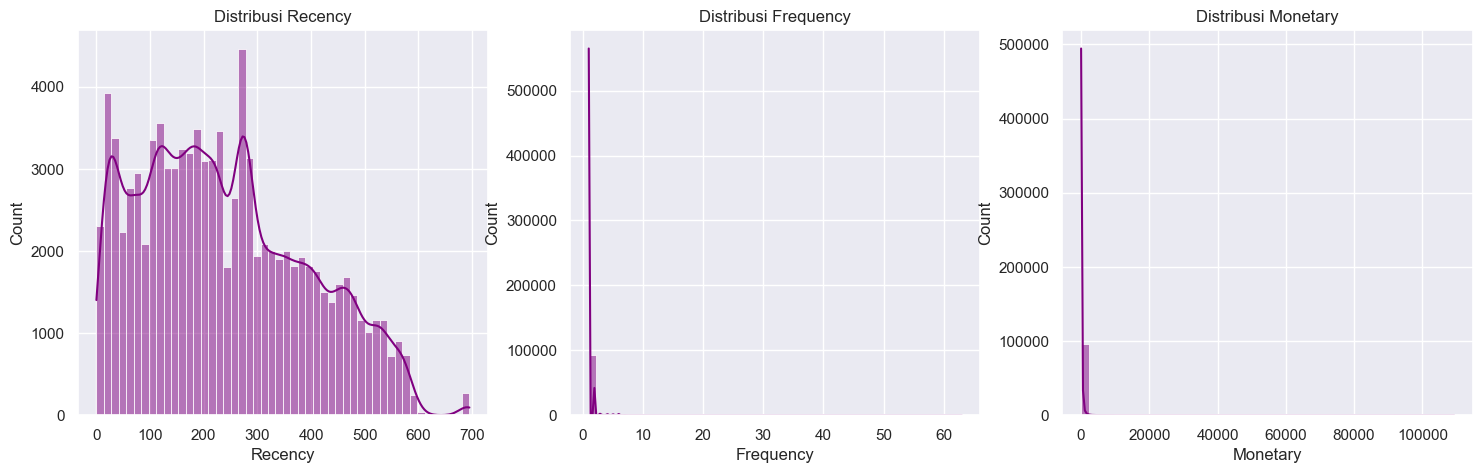

In [100]:
# Visualisasi distribusi Recency, Frequency, dan Monetary
fig, axes = plt.subplots(1, 3, figsize=(18, 5))


sns.histplot(rfm_df['Recency'], bins=50, kde=True, ax=axes[0],color='purple')
axes[0].set_title('Distribusi Recency')

sns.histplot(rfm_df['Frequency'], bins=50, kde=True, ax=axes[1],color='purple')
axes[1].set_title('Distribusi Frequency')

sns.histplot(rfm_df['Monetary'], bins=50, kde=True, ax=axes[2],color='purple')
axes[2].set_title('Distribusi Monetary')

plt.show()


In [90]:
# Mengatasi jumlah nilai unik yang sedikit → rank(method="first") memastikan data tetap terurut unik.
rfm_df['R_Score'] = pd.cut(rfm_df['Recency'].rank(method="first"), bins=3, labels=[3, 2, 1])
rfm_df['F_Score'] = pd.cut(rfm_df['Frequency'].rank(method="first"), bins=3, labels=[1, 2, 3])
rfm_df['M_Score'] = pd.cut(rfm_df['Monetary'].rank(method="first"), bins=3, labels=[1, 2, 3])

# Gabungkan skor menjadi RFM Score
rfm_df['RFM_Score'] = (
    rfm_df['R_Score'].astype(str) + 
    rfm_df['F_Score'].astype(str) + 
    rfm_df['M_Score'].astype(str)
)

rfm_df.head()


,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score
customer_id,,,,,,,
00012a2ce6f8dcda20d059ce98491703,287,1,114.74,2,1,2,212
000161a058600d5901f007fab4c27140,409,1,67.41,1,1,1,111
0001fd6190edaaf884bcaf3d49edf079,547,1,195.42,1,1,3,113
0002414f95344307404f0ace7a26f1d5,378,1,179.35,1,1,3,113
000379cdec625522490c315e70c7a9fb,149,1,107.01,3,1,2,312


In [91]:
# Mengatasi jumlah nilai unik yang sedikit → rank(method="first") memastikan data tetap terurut unik.
rfm_df['R_Score'] = pd.cut(rfm_df['Recency'].rank(method="first"), bins=3, labels=[3, 2, 1])
rfm_df['F_Score'] = pd.cut(rfm_df['Frequency'].rank(method="first"), bins=3, labels=[1, 2, 3])
rfm_df['M_Score'] = pd.cut(rfm_df['Monetary'].rank(method="first"), bins=3, labels=[1, 2, 3])

# Gabungkan skor menjadi RFM Score
rfm_df['RFM_Score'] = (
    rfm_df['R_Score'].astype(str) + 
    rfm_df['F_Score'].astype(str) + 
    rfm_df['M_Score'].astype(str)
)

rfm_df.head()


,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score
customer_id,,,,,,,
00012a2ce6f8dcda20d059ce98491703,287,1,114.74,2,1,2,212
000161a058600d5901f007fab4c27140,409,1,67.41,1,1,1,111
0001fd6190edaaf884bcaf3d49edf079,547,1,195.42,1,1,3,113
0002414f95344307404f0ace7a26f1d5,378,1,179.35,1,1,3,113
000379cdec625522490c315e70c7a9fb,149,1,107.01,3,1,2,312


In [95]:
def segment_customer(row):
    r, f, m = int(row['R_Score']), int(row['F_Score']), int(row['M_Score'])

    if r == 3 and f == 3 and m == 3:
        return 'Loyal Customers'
    elif r == 3 and (f < 3 or m < 3):
        return 'Promising'
    elif r < 3 and f >= 2 and m >= 2:
        return 'Customers Needing Attention'
    else:
        return 'Hibernating'

# Buat kolom baru untuk segmentasi
rfm_df['Segment'] = rfm_df.apply(segment_customer, axis=1)

# Lihat hasil
print(rfm_df['Segment'].value_counts())

Segment
Hibernating                    34953
Customers Needing Attention    29353
Promising                      27258
Loyal Customers                 4896
Name: count, dtype: int64


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_17736\851653870.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=rfm_df, x='Segment', order=rfm_df['Segment'].value_counts().index, palette=pastel_lilac_purple_palette)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_17736\851653870.py:3: UserWarning: The palette list has more values (6) than needed (4), which may not be intended.
  sns.countplot(data=rfm_df, x='Segment', order=rfm_df['Segment'].value_counts().index, palette=pastel_lilac_purple_palette)


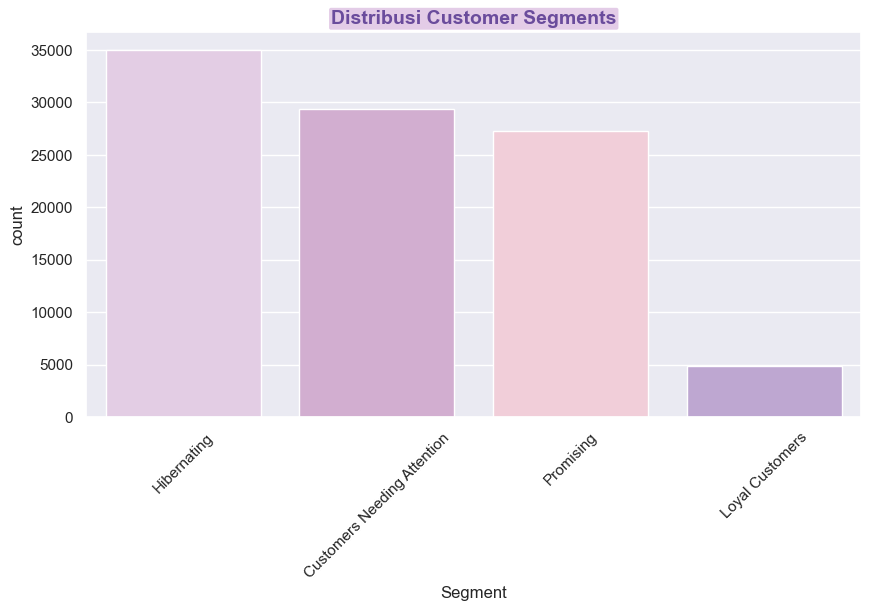

In [102]:
# Visualisasi distribusi customer segments
plt.figure(figsize=(10,5))
sns.countplot(data=rfm_df, x='Segment', order=rfm_df['Segment'].value_counts().index, palette=pastel_lilac_purple_palette)
plt.xticks(rotation=45)
plt.title('Distribusi Customer Segments',color="#6A4C9C", fontsize=14,      
          fontweight='bold',
          bbox=dict(facecolor='#D8B7DD', alpha=0.7, edgecolor='none', boxstyle='round',pad=0.1))
plt.show()


**Insight:**

> Berdasarkan analisis Recency, Frequency, dan Monetary (RFM), transaksi terakhir tercatat pada 29 Agustus 2018 pukul 15:00:37. Rata-rata pelanggan hanya melakukan 1 kali transaksi, tetapi terdapat pelanggan yang bertransaksi hingga 63 kali. Dari sisi pengeluaran, mayoritas pelanggan memiliki pola belanja yang moderat, namun ada pelanggan dengan total pengeluaran tertinggi mencapai $109.312,64.

> Hasil segmentasi RFM Analysis menunjukkan bahwa pelanggan terbagi ke dalam empat segmen utama:

- Hibernating → 34.953 pelanggan
- Customers Needing Attention → 29.353 pelanggan
- Promising → 27.258 pelanggan
- Loyal Customers → 4.896 pelanggan

Penjelasan Segmen Pelanggan:

🔵 Hibernating → Pelanggan di segmen ini memiliki tingkat recency yang rendah (sudah lama tidak bertransaksi), frequency yang rendah (jarang melakukan transaksi), dan monetary yang rendah (pengeluaran minim). Mereka berisiko untuk berhenti menjadi pelanggan, sehingga perlu strategi untuk menarik kembali perhatian mereka, seperti memberikan diskon khusus atau kampanye melalui email marketing.

🟠 Customers Needing Attention → Segmen ini terdiri dari pelanggan yang sebelumnya aktif, namun dalam waktu belakangan ini tidak melakukan transaksi. Meskipun frekuensi dan total pengeluaran mereka bervariasi, tingkat recency-nya semakin menurun. Strategi retensi bisa dilakukan dengan pengingat transaksi, penawaran eksklusif, atau program loyalitas untuk meningkatkan kembali keterlibatan mereka.

🟡 Promising → Pelanggan dalam segmen ini menunjukkan keterlibatan yang cukup baik meskipun belum terlalu sering bertransaksi. Mereka baru-baru ini mulai melakukan transaksi, dan masih ada peluang untuk menjadikan mereka pelanggan yang setia. Dapat diberikan insentif seperti penawaran untuk pembelian kedua, program referral, atau promosi eksklusif untuk mendorong loyalitas mereka.

🟢 Loyal Customers → Segmen ini terdiri dari pelanggan yang paling setia dengan frekuensi dan pengeluaran yang tinggi, serta tingkat recency yang baik. Mereka sering melakukan transaksi dan memberikan kontribusi signifikan terhadap pendapatan. Untuk mempertahankan loyalitas mereka, strategi utama adalah dengan menawarkan keistimewaan seperti akses VIP, akses lebih awal ke produk baru, atau reward eksklusif.

## Conclusion

- Dominasi pembelian terjadi pada kategori kesehatan & kecantikan `(health_beauty)`, hadiah & jam tangan `(watches_gifts)`, serta perlengkapan rumah `(bed_bath_table)`. Sementara kategori keamanan & layanan `(security_and_services)` memiliki penjualan terendah.
- Penjualan Tertinggi terjadi pada bulan November 2017 dalam kurun waktu 2016 - 2018.
- Tren jumlah pesanan menunjukkan peningkatan dari tahun 2016 hingga 2017, namun mengalami penurunan pada tahun 2018.
- Metode pembayaran yang paling populer adalah kartu kredit, diikuti oleh boleto dan voucher. Sedangkan debit card merupakan metode pembayaran yang paling jarang digunakan
- Tingkat Kepuasan tertinggi pada layanan E commerce adalah 5 . Ini menunjukan bahwa service atau pelayanan yang di dapat sangat memuaskan bagi pelanggan.
- Transaksi terakhir tercatat pada 29 Agustus 2018 pukul 15:00:37.
- Rata-rata pelanggan hanya melakukan 1 kali transaksi, tetapi terdapat pelanggan yang bertransaksi hingga 63 kali. 
- Mayoritas pelanggan memiliki pola belanja yang moderat, namun ada pelanggan dengan total pengeluaran tertinggi mencapai $109.312,64. Berdasarkan segmentasi RFM, pelanggan terbagi ke dalam empat segmen utama: Hibernating, Customers Needing Attention, Promising, dan Loyal Customers. Pelanggan dalam segmen Hibernating memiliki risiko churn dan memerlukan strategi re-engagement. Pelanggan dalam segmen Customers Needing Attention memerlukan strategi retensi. Pelanggan dalam segmen Promising memiliki peluang konversi menjadi pelanggan loyal. Sedangkan pelanggan dalam segmen Loyal Customers merupakan pelanggan terbaik yang memerlukan strategi untuk mempertahankan loyalitas mereka.